In [69]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('10_year_disparities.csv')
data

Label      2010      2011      2012  \
0                               White alone  6.923398  7.185899  7.423936   
1           Black or African American alone -1.492582 -1.511352 -1.509923   
2   American Indian and Alaska Native alone  0.758135  0.751089  0.749423   
3                               Asian alone -1.050243 -1.075642 -1.122470   
4          Hispanic or Latino (of any race) -5.635275 -5.866519 -6.037151   
5                            15 to 19 years -0.048563 -0.058193 -0.040529   
6                            20 to 24 years  0.055245  0.051503  0.037046   
7                            25 to 34 years -0.096438 -0.074461 -0.082353   
8                            35 to 44 years -0.339439 -0.338166 -0.339527   
9                            45 to 54 years  0.070783  0.012984 -0.028541   
10                           55 to 59 years  0.202951  0.199598  0.199397   
11                           60 to 64 years  0.158791  0.188632  0.207017   
12                           65 to 74 years  0.136075  0.152709  0.158920   
13                           75 to 84 years  0.053725  0.068787  0.063828   
14                                     Male  0.156466  0.122810  0.138071   
15                                   Female -0.156466 -0.122810 -0.138071   

        2013      2014      2015      2016      2017      2018      2019  \
0   7.620138  7.960572  8.245187  8.372992  8.623459  8.637067  8.682231   
1  -1.486772 -1.444502 -1.439964 -1.414725 -1.421584 -1.375303 -1.377853   
2   0.754454  0.761133  0.725298  0.755228  0.755644  0.766487  0.755690   
3  -1.179047 -1.245835 -1.310496 -1.269798 -1.291841 -1.260097 -1.225192   
4  -6.205799 -6.490631 -6.737103 -6.895091 -7.139223 -7.242535 -7.313978   
5  -0.048612 -0.012465  0.006789 -0.015014 -0.011847  0.004125 -0.012990   
6   0.083897  0.059556  0.057871  0.046182  0.049160  0.015572  0.029959   
7  -0.097073 -0.101459 -0.134958 -0.164374 -0.183284 -0.197254 -0.198885   
8  -0.322080 -0.304992 -0.291928 -0.267625 -0.256470 -0.232827 -0.200780   
9  -0.086461 -0.139409 -0.176973 -0.186959 -0.256495 -0.234741 -0.266438   
10  0.163217  0.168746  0.175918  0.162324  0.149415  0.116407  0.082872   
11  0.225604  0.215975  0.210385  0.228363  0.234650  0.239302  0.252691   
12  0.178210  0.208397  0.227894  0.265854  0.323181  0.366407  0.382943   
13  0.059975  0.064019  0.052643  0.047919  0.074675  0.081047  0.087984   
14  0.153884  0.149419  0.149592  0.152752  0.145460  0.123519  0.123209   
15 -0.153884 -0.149419 -0.149592 -0.152752 -0.145460 -0.123519 -0.123209   

     average  
0   7.967488  
1  -1.447456  
2   0.753258  
3  -1.203066  
4  -6.556330  
5  -0.023730  
6   0.048599  
7  -0.133054  
8  -0.289383  
9  -0.129225  
10  0.162084  
11  0.216141  
12  0.240059  
13  0.065460  
14  0.141518  
15 -0.141518

In [67]:
nnAge = 30
nnGender = 'Male'
nnRace = 'White'

lass person():
    def __init__(self,age,gender,race):
        self.age = age
        self.gender = gender
        self.race = race
        self.numVotes = 0
        person.classify(self)
        
    def classify(self):    
        numVotes = 0.0
    
        rowNames = list(data['Label'])    
        for i in data['Label']:
            if (str(self.age) in i) or (self.gender in i) or (self.race in i):
                numVotes = numVotes + float(data.iloc[rowNames.index(i)]['average'])
        self.numVotes = numVotes

man = person(nnAge,nnGender,nnRace)
print(man.numVotes)

jsonStr = json.dumps(man.__dict__)
print(jsonStr)

8.109006102
-6.697848635
{"age": 30, "gender": "Male", "race": "White", "numVotes": 8.109006102}


In [98]:
def variable_table(start, end): 
    deltas_var = data[["Label", "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]].iloc[start:end]
    deltas_var = deltas_var.groupby('Label').mean()
    deltas_var = deltas_var.swapaxes('index', 'columns')
    return deltas_var

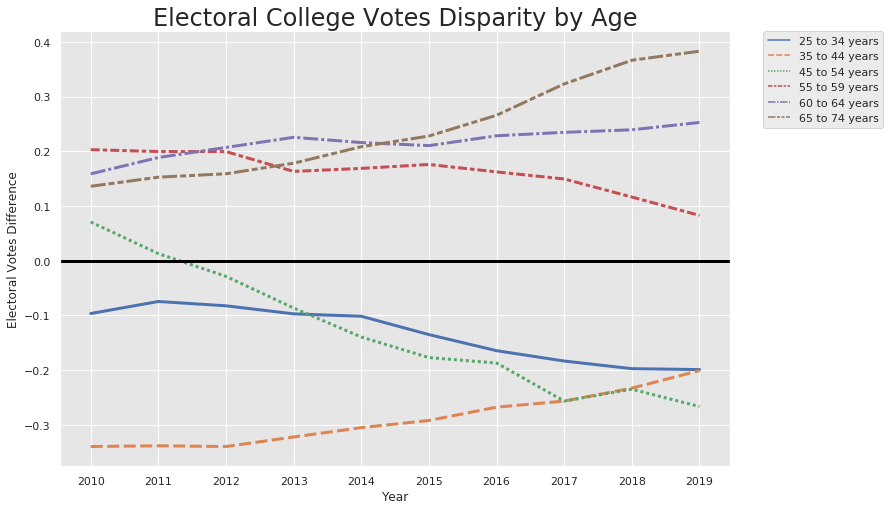

In [99]:
def plot_table(start,end,metric):
    deltas_race = variable_table(start,end)

    sns.set(rc={'figure.figsize':(12,8)})

    # sns.set(style="whitegrid") #White background 
    sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #grey background

    g = sns.lineplot(data = deltas_race,linestyle = '-', linewidth = 3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #axis line at y=0
    g.axhline(0, color = 'black', linewidth = 3)

    #labels + title
    g.set_title("Electoral College Votes Disparity by " + metric, size=24)
    g.set(xlabel='Year', ylabel='Electoral Votes Difference')
    
plot_table(7,13,'Age')

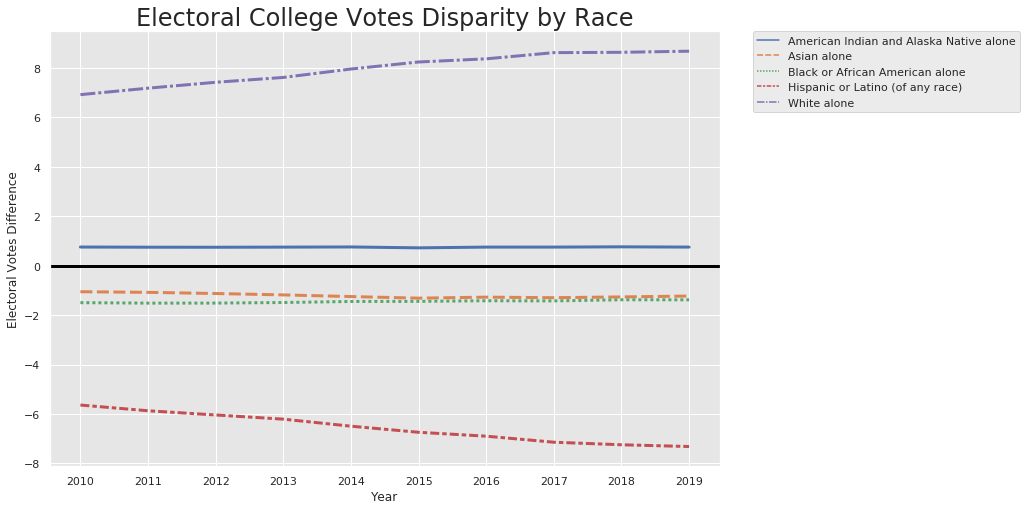

In [101]:
plot_table(0,5,'Race')

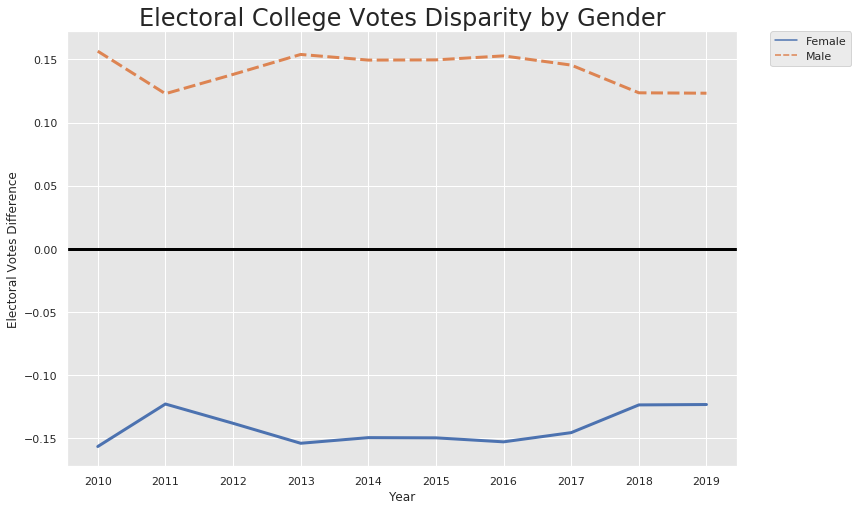

In [102]:
plot_table(14,16,'Gender')

In [ ]:
def variable(start, end): 
    deltas_var = data.iloc[start:end]
    deltas_var = deltas_var.groupby('Label').mean()
    deltas_var = deltas_var.swapaxes('index', 'columns')
    return deltas_var

def plot(start,end,metric):
    deltas_race = variable_table(start,end)

    sns.set(rc={'figure.figsize':(12,8)})

    # sns.set(style="whitegrid") #White background 
    sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #grey background

    g = sns.lineplot(data = deltas_race,linestyle = '-', linewidth = 3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #axis line at y=0
    g.axhline(0, color = 'black', linewidth = 3)

    #labels + title
    g.set_title("Electoral College Votes Disparity by " + metric, size=24)
    g.set(xlabel='Year', ylabel='Electoral Votes Difference')
    
plot_table(7,13,'Age')